# Classification Demo

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

- this dataset contains the target variable of type categorical data, this is a classification example
- since it is a classification example, we will be using LogisticRegression instead of using Linear Regression

In [2]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### exploratory data analysis

In [3]:
# get the basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
# check if there are any NA records
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [5]:
# get statistical info about the dataset
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
# perform correlation analysis
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

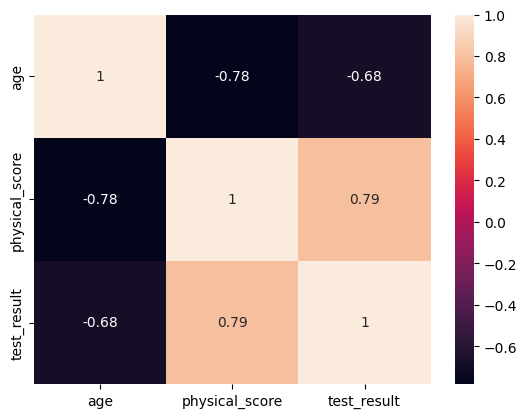

In [7]:
# perform correlation analysis
sns.heatmap(df.corr(), annot=True)

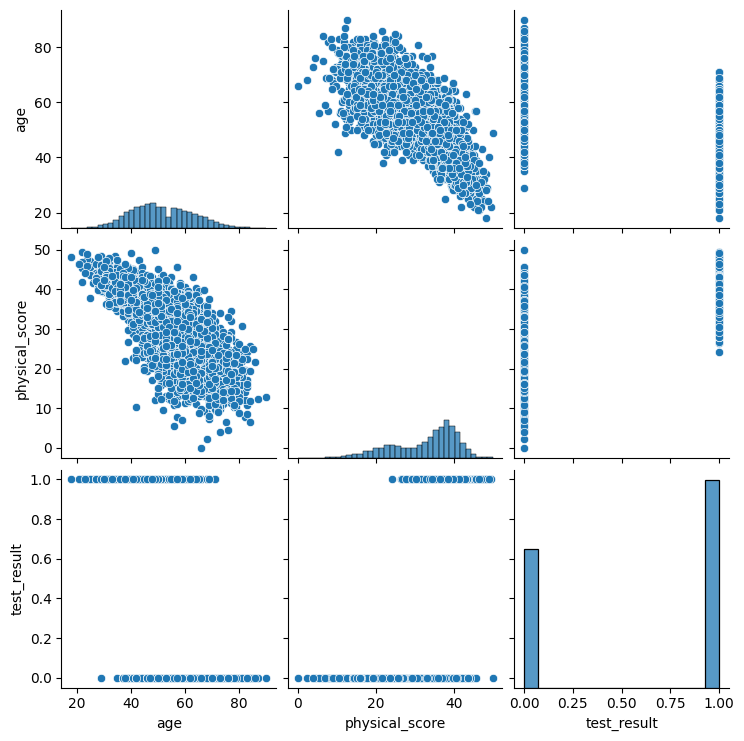

In [40]:
sns.pairplot(df)

### split the data

In [8]:
# select x and y
x = df.drop('test_result', axis=1)
y = df['test_result']

In [9]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1234)

### build the model

In [10]:
from sklearn.linear_model import LogisticRegressionCV

# create an empty model
model = LogisticRegressionCV()

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV()

### model evaluation

In [12]:
# predict the testing data
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [16]:
x_test.head()

,age,physical_score
2706,34.0,40.4
2436,38.0,41.5
1201,49.0,31.8
1486,42.0,41.1
4286,38.0,21.9


In [17]:
y_test

2706    1
2436    1
1201    0
1486    1
4286    0
       ..
4470    1
1930    1
4460    0
2041    1
2805    1
Name: test_result, Length: 1500, dtype: int64

In [18]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

#### confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[521,  63],
       [ 62, 854]])

In [23]:
tn, fp, fn, tp = cm.ravel()

print(f"true negative = {tn}")
print(f"true positive = {tp}")
print(f"false negative = {fn}")
print(f"false positive = {fp}")

true negative = 521
true positive = 854
false negative = 62
false positive = 63


#### accuracy

In [24]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 91.67%


In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 91.67%


#### precision

In [27]:
precision = tp / (tp + fp)
print(f"precision = {precision * 100:.2f}%")

precision = 93.13%


In [28]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"precision = {precision * 100:.2f}%")

precision = 93.13%


#### recall

In [29]:
recall = tp / (tp + fn)
print(f"recall = {recall * 100:.2f}%")

recall = 93.23%


In [30]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"recall = {recall * 100:.2f}%")

recall = 93.23%


#### f1 score

In [31]:
f1 = 2 * ((precision * recall) / (precision + recall))
print(f"f1 score = {f1 * 100:.2f}%")

f1 score = 93.18%


In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"f1 score = {f1 * 100:.2f}%")

f1 score = 93.18%


#### classification report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       584
           1       0.93      0.93      0.93       916

    accuracy                           0.92      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.92      0.92      0.92      1500



### result visualization

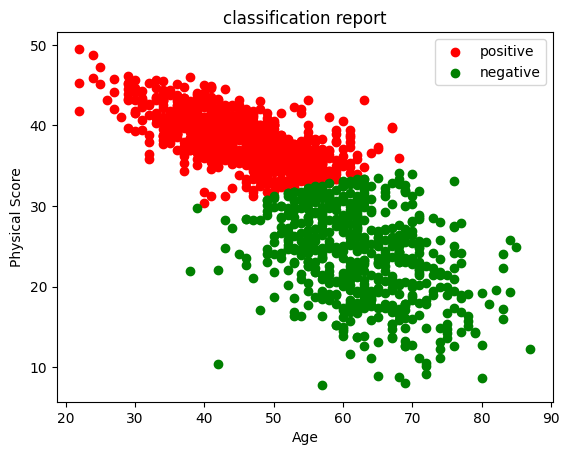

In [38]:
plt.scatter(x_test['age'][y_pred == 1], x_test['physical_score'][y_pred == 1], color="red", label="positive")
plt.scatter(x_test['age'][y_pred == 0], x_test['physical_score'][y_pred == 0], color="green", label="negative")
plt.xlabel("Age")
plt.ylabel("Physical Score")
plt.title("classification report")
plt.legend()

### save the model

In [39]:
import pickle

with open("hearing_test_model.pkl", "wb") as file:
    pickle.dump(model, file)